<a href="https://colab.research.google.com/github/SidharthBhakth/Intro-to-TF-2.0/blob/master/2_Linear_Regression_in_TF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Model Moore's law (the number of transistors in a doubles about every two years) using **linear regression**.

In [0]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
# Load in the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

data = pd.read_csv('moore.csv', header=None).values

--2020-05-10 23:53:16--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-10 23:53:16 (41.3 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [0]:
X = data[:,0].reshape(-1,1) #transform to a 2-D array of size N x D where D=1
Y = data[:,1]

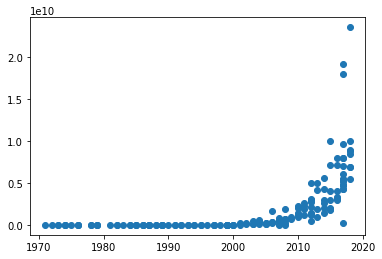

In [4]:
# Plot the data - it is exponential
plt.scatter(X, Y)
plt.show()

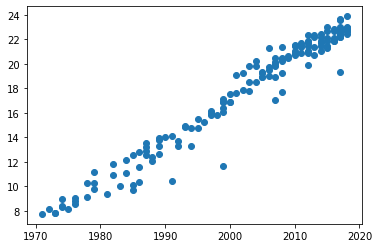

In [5]:
# Apply log transformation to Y and plot
Y = np.log(Y)

plt.scatter(X, Y)
plt.show()

In [0]:
# Center X data
X = X - X.mean()

In [0]:
# Build the model

model = Sequential()

model.add(Dense(1, input_shape=(1,)))

# Compile
model.compile(optimizer=SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = LearningRateScheduler(schedule)

In [8]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 659.5116 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 590.2292 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 382.5877 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 213.8169 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 281.4702 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 220.2218 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 283.6161 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 116.3295 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 102.9397 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 92.6933 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss

In [9]:
r.history.keys()

dict_keys(['loss', 'lr'])

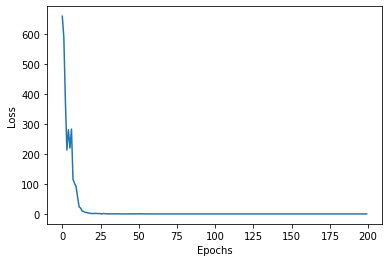

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
# Model weights
print(model.layers[0].get_weights())

[array([[0.33099297]], dtype=float32), array([17.755705], dtype=float32)]


In [12]:
# Slope of regression line
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.33099297


Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is the transistor count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


This holds for any $ t $. In other words, the growth rate does not change over time.

In [13]:
print("Number of transistors doubles in about {} years.".format(np.round(np.log(2)/a)))

Number of transistors doubles in about 2.0 years.


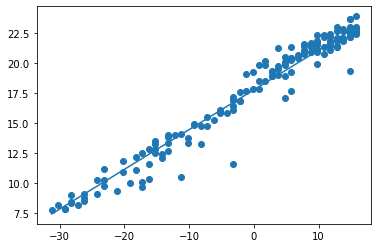

In [14]:
# Make predictions
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)
plt.show()

In [15]:
# Predict with model coefficients

# Get the model coefficients
w, b = model.layers[0].get_weights()

#X = X.reshape(-1, 1)

Y_hat2 = (np.dot(X, w) + b).flatten()

np.allclose(Y_hat, Y_hat2)

True